### This notebook will be used to QC SEA imputed data from Michigan imputation server (MIS) and TopMed imputation server

Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read <code>info.gz</code> files with metrics from imputation

In [2]:
# Read TOPMed data
# chr21 = pd.read_table("/labs/tassimes/rodrigoguarischi/projects/sea/imputed_genotypes/topmed/tmp_extraction/chr21.info.gz")

# Read MIS data
chr21 = pd.read_table("/labs/tassimes/rodrigoguarischi/projects/sea/imputed_genotypes/michigan_hrc/from_hg38_vcfs/tmp_extraction/chr21.info.gz")

# Print the first 5 lines
chr21[0:5]

,SNP,REF(0),ALT(1),ALT_Frq,MAF,AvgCall,Rsq,Genotyped,LooRsq,EmpR,EmpRsq,Dose0,Dose1
0,21:9411245:C:A,C,A,0.00066,0.00066,0.99934,0.00195,Imputed,-,-,-,-,-
1,21:9411298:G:A,G,A,0.00020,0.00020,0.99980,0.00006,Imputed,-,-,-,-,-
2,21:9411313:G:A,G,A,0.00004,0.00004,0.99996,0.00921,Imputed,-,-,-,-,-
3,21:9411347:G:C,G,C,0.00016,0.00016,0.99984,0.09798,Imputed,-,-,-,-,-
4,21:9411354:A:G,A,G,0.00040,0.00040,0.99960,0.00589,Imputed,-,-,-,-,-


In [3]:
chr21_genotyped = chr21[ chr21.Genotyped == "Genotyped" ]

chr21_genotyped_coords = chr21_genotyped.SNP.str.split(":", n=3, expand = True)
chr21_genotyped_coords.columns = ["chr", "pos", "ref", "alt"]

chr21_genotyped = chr21_genotyped.join( chr21_genotyped_coords[ ["chr", "pos"] ] )

# Print the first 5 lines
chr21_genotyped[0:5]


,SNP,REF(0),ALT(1),ALT_Frq,MAF,AvgCall,Rsq,Genotyped,LooRsq,EmpR,EmpRsq,Dose0,Dose1,chr,pos
8437,21:14756926:T:C,T,C,0.00524,0.00524,0.99991,0.98577,Genotyped,0.761,0.916,0.83914,0.73832,0.00058,21,14756926
8490,21:14760841:G:A,G,A,0.00563,0.00563,0.99997,0.99469,Genotyped,0.679,0.957,0.91592,0.89120,0.00215,21,14760841
10172,21:14889913:C:T,C,T,0.18055,0.18055,0.99790,0.98586,Genotyped,0.021,0.224,0.05029,0.11238,0.08773,21,14889913
11500,21:15169985:C:A,C,A,0.19046,0.19046,0.99792,0.98670,Genotyped,0.038,0.138,0.01915,0.01375,0.00743,21,15169985
14563,21:15322836:T:C,T,C,0.13472,0.13472,0.99759,0.97942,Genotyped,0.023,0.284,0.08075,0.20500,0.15855,21,15322836


Create a plot of **Rsq** along with the chromosome genomic positions

Text(0, 0.5, 'Empirical (Leave-One-Out) R²')

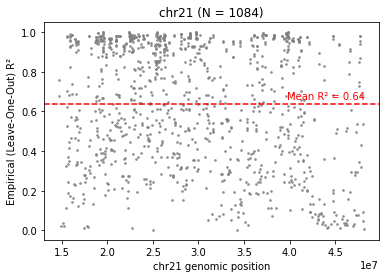

In [4]:
import matplotlib.pyplot as plt
import statistics

# Create scatter plot of genomic positions by estimated r2 (from minimac4 leave one out column)
plt.scatter( 
    x = chr21_genotyped.pos.astype(int), 
    y = chr21_genotyped.LooRsq.astype(float), 
    marker = 'o',
    color='gray',
    s=3,
    alpha=0.75
    )

# Add horizontal line with mean LooRsq
mean_rsq = statistics.mean( chr21_genotyped.LooRsq.astype(float) )
plt.axhline(
    y=mean_rsq, 
    color='red',
    linestyle='--'
    )
plt.text( 
    x = max(chr21_genotyped.pos.astype(int))*0.825,
    y = mean_rsq+0.025,
    s = "Mean R\u00b2 = {:.2f}".format(mean_rsq),
    color='red'
    )

# Adjust labels and axis
plt.title( "chr21 (N = " + str(len(chr21_genotyped)) + ")" )
plt.xlabel("chr21 genomic position")
plt.ylabel("Empirical (Leave-One-Out) R\u00b2")

Text(0, 0.5, 'Frequency')

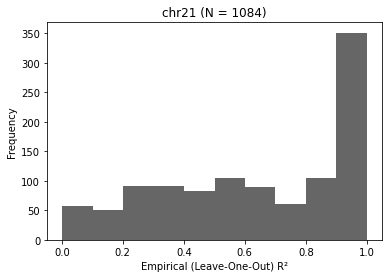

In [5]:
# Make a histogram of LooRsq
plt.hist(
  x = chr21_genotyped.LooRsq.astype(float),
  bins = 10,
  color='black',
  alpha = 0.6
  )

# Adjust labels and axis
plt.title( "chr21 (N = " + str(len(chr21_genotyped)) + ")" )
plt.xlabel("Empirical (Leave-One-Out) R\u00b2")
plt.ylabel("Frequency")

In [6]:
# Get number of passing variants at different RSq levels 
rsq_filter = [0, 0.001, 0.1, 0.2, 0.3]

total = len(chr21.Rsq.astype(float))

for c_rsq in rsq_filter:
    passing = sum ( chr21.Rsq.astype(float) >= c_rsq)
    print ("Passing = {0:,}, filtered= {1:,} \t (RSq threshold = {2:,})".format(passing, total-passing, c_rsq) )

Passing = 531,276, filtered= 0 	 (RSq threshold = 0)
Passing = 485,041, filtered= 46,235 	 (RSq threshold = 0.001)
Passing = 286,424, filtered= 244,852 	 (RSq threshold = 0.1)
Passing = 241,552, filtered= 289,724 	 (RSq threshold = 0.2)
Passing = 201,786, filtered= 329,490 	 (RSq threshold = 0.3)


Create a plot of **MAF** by **Mean imputation Rsq** 

In [7]:
# chr21.Rsq.describe()

chr21_gt10e3 = chr21[ chr21.Rsq >= 0.1 ]

chr21_gt10e3.describe()

,ALT_Frq,MAF,AvgCall,Rsq
count,286424.000000,286424.000000,286424.000000,286424.000000
mean,0.081514,0.067712,0.964091,0.435328
std,0.162786,0.121480,0.068500,0.205266
min,0.000050,0.000050,0.599030,0.100000
25%,0.001610,0.001610,0.970140,0.267830
50%,0.007080,0.007080,0.995720,0.428430
75%,0.061823,0.061820,0.998900,0.576510
max,0.939320,0.500000,1.000000,1.000000
